In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [3]:
customer_chur=pd.read_csv('customer_churn.csv')
customer_chur.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
display(customer_chur.shape)
customer_chur.dtypes

(7043, 21)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
customer_chur.isna().sum()



customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
customer_chur.iloc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [7]:
customer_chur['TotalCharges'].value_counts(dropna=False)

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [8]:
customer_chur.replace(to_replace=" ", value='', regex=True,inplace=True)

In [9]:
customer_chur['TotalCharges'].value_counts(dropna=False)

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [10]:
customer_chur['TotalCharges'] = pd.to_numeric(customer_chur['TotalCharges'])

In [11]:
customer_chur.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [12]:
Mean_TotalCharges_Value = customer_chur['TotalCharges'].mean()
Mean_TotalCharges_Value

2283.3004408418697

In [13]:
customer_chur['TotalCharges'] = customer_chur['TotalCharges'].fillna(Mean_TotalCharges_Value)

In [14]:
customer_chur['TotalCharges'].value_counts(dropna=False)

2283.300441    11
20.200000      11
19.750000       9
20.050000       8
19.900000       8
               ..
6849.400000     1
692.350000      1
130.150000      1
3211.900000     1
6844.500000     1
Name: TotalCharges, Length: 6531, dtype: int64

In [15]:
customer_chur=customer_chur.drop(['customerID'], axis=1)

In [16]:
customer_chur['SeniorCitizen'].value_counts(dropna=False)

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [17]:
customer_chur['tenure'].value_counts(dropna=False)


1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [18]:
customer_chur['MultipleLines'].value_counts(dropna=False)



No                3390
Yes               2971
Nophoneservice     682
Name: MultipleLines, dtype: int64

In [19]:
cols = []
for i in range(len(customer_chur.columns)):
    cols.append(customer_chur.columns[i].lower())
customer_chur.columns = cols

print(customer_chur.columns)

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')


In [20]:
customer_chur.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,Nophoneservice,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electroniccheck,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,Oneyear,No,Mailedcheck,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailedcheck,53.85,108.15,Yes
3,Male,0,No,No,45,No,Nophoneservice,DSL,Yes,No,Yes,Yes,No,No,Oneyear,No,Banktransfer(automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiberoptic,No,No,No,No,No,No,Month-to-month,Yes,Electroniccheck,70.70,151.65,Yes


In [21]:
def churny(x):
    if x =='No':
        return 0
    else:
        return 1
    
customer_chur['churn'] = list(map(churny, customer_chur['churn']))

customer_chur.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,Nophoneservice,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electroniccheck,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,Oneyear,No,Mailedcheck,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailedcheck,53.85,108.15,1
3,Male,0,No,No,45,No,Nophoneservice,DSL,Yes,No,Yes,Yes,No,No,Oneyear,No,Banktransfer(automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiberoptic,No,No,No,No,No,No,Month-to-month,Yes,Electroniccheck,70.70,151.65,1


In [22]:
numerical = customer_chur.select_dtypes(np.number)

correlations = numerical.corr()
correlations

,seniorcitizen,tenure,monthlycharges,totalcharges,churn
seniorcitizen,1.000000,0.016567,0.220173,0.102395,0.150889
tenure,0.016567,1.000000,0.247900,0.824757,-0.352229
monthlycharges,0.220173,0.247900,1.000000,0.650468,0.193356
totalcharges,0.102395,0.824757,0.650468,1.000000,-0.199428
churn,0.150889,-0.352229,0.193356,-0.199428,1.000000


C:\Users\joanv\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


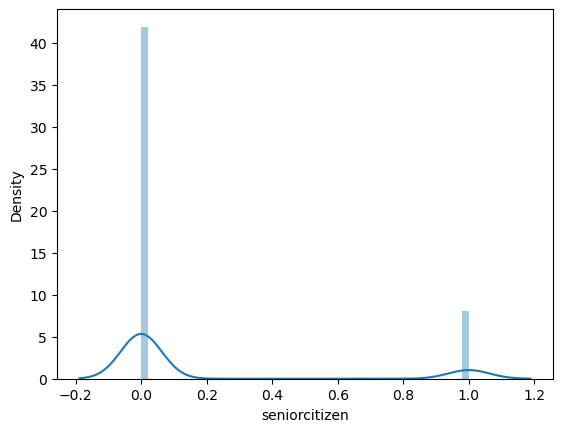

C:\Users\joanv\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


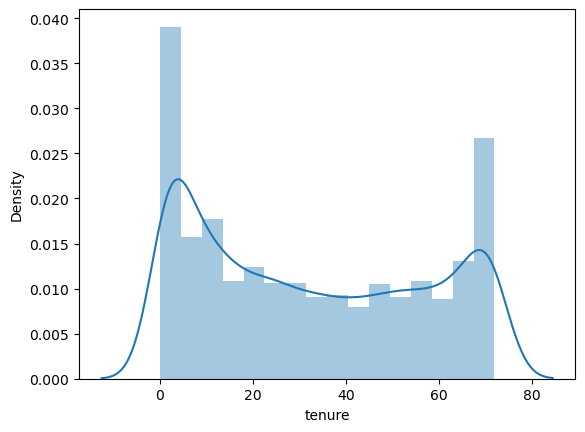

C:\Users\joanv\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


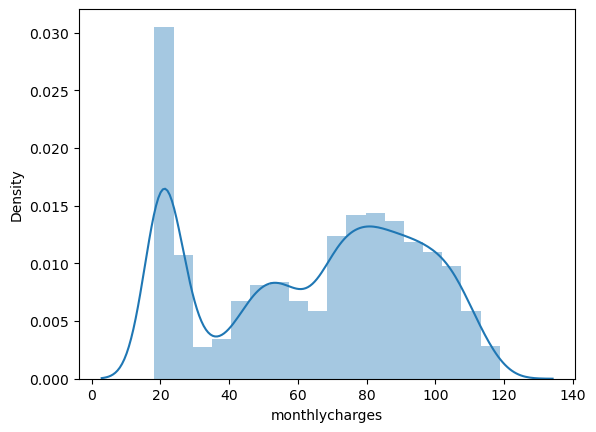

C:\Users\joanv\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


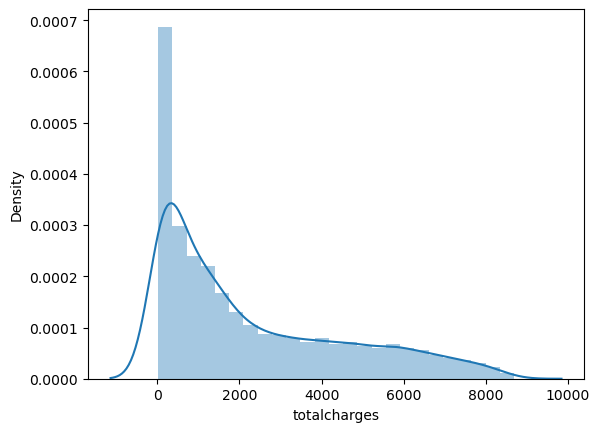

C:\Users\joanv\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


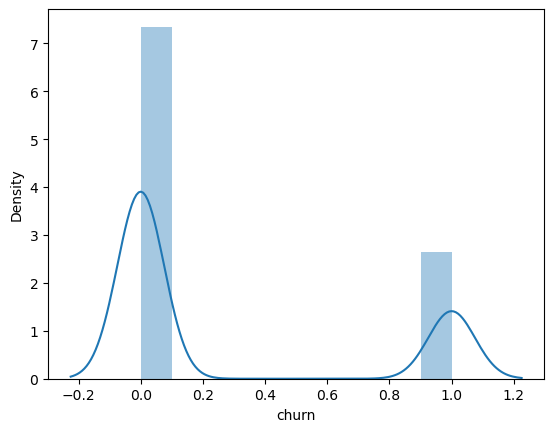

In [23]:
for column in numerical.columns:
    sns.distplot(numerical[column])
    plt.show()

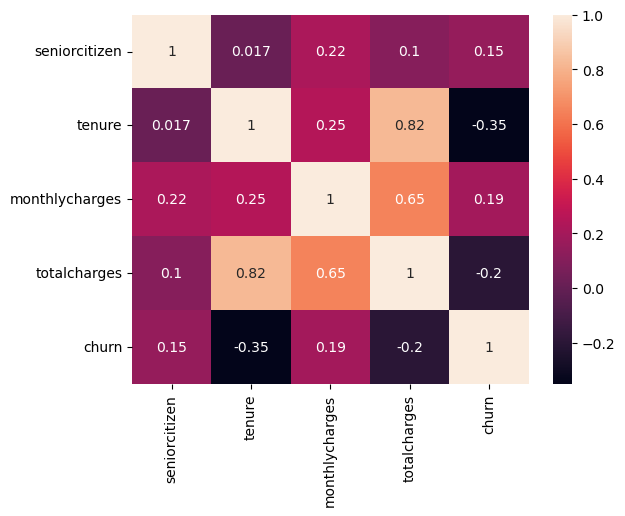

In [49]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

correlations_matrix = customer_chur.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [50]:
X=customer_chur.drop('churn', axis=1)
y=customer_chur['churn']

In [51]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler


X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

X_num.head()


,seniorcitizen,tenure,monthlycharges,totalcharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [52]:
X_cat.head()


,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod
0,Female,Yes,No,No,Nophoneservice,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electroniccheck
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,Oneyear,No,Mailedcheck
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailedcheck
3,Male,No,No,No,Nophoneservice,DSL,Yes,No,Yes,Yes,No,No,Oneyear,No,Banktransfer(automatic)
4,Female,No,No,Yes,No,Fiberoptic,No,No,No,No,No,No,Month-to-month,Yes,Electroniccheck


In [53]:
print (X.shape, X_num.shape, X_cat.shape)

(7043, 19) (7043, 4) (7043, 15)


In [54]:
X_num.describe().T

,count,mean,std,min,25%,50%,75%,max
seniorcitizen,7043.0,0.162147,0.368612,0.00,0.000,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
monthlycharges,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.85,118.75
totalcharges,7043.0,2283.300441,2265.000258,18.80,402.225,1400.55,3786.60,8684.80


In [55]:
from sklearn.preprocessing import MinMaxScaler

MinMaxtransformer = MinMaxScaler().fit(X_num)
X_normalized = MinMaxtransformer.transform(X_num)
print(X_normalized.shape)
X_normalized = pd.DataFrame(X_normalized,columns=X_num.columns)
X_normalized.head()




(7043, 4)


,seniorcitizen,tenure,monthlycharges,totalcharges
0,0.0,0.013889,0.115423,0.001275
1,0.0,0.472222,0.385075,0.215867
2,0.0,0.027778,0.354229,0.010310
3,0.0,0.625000,0.239303,0.210241
4,0.0,0.027778,0.521891,0.015330


In [56]:
X_normalized.describe().T

,count,mean,std,min,25%,50%,75%,max
seniorcitizen,7043.0,0.162147,0.368612,0.0,0.000000,0.000000,0.000000,1.0
tenure,7043.0,0.449599,0.341104,0.0,0.125000,0.402778,0.763889,1.0
monthlycharges,7043.0,0.462803,0.299403,0.0,0.171642,0.518408,0.712438,1.0
totalcharges,7043.0,0.261309,0.261366,0.0,0.044245,0.159445,0.434780,1.0


In [61]:
X_cat.columns

Index(['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod'],
      dtype='object')

In [57]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from seaborn import load_dataset


encoder = OneHotEncoder(drop='first').fit(X_cat)
print(encoder.categories_)


[array(['Female', 'Male'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'Nophoneservice', 'Yes'], dtype=object), array(['DSL', 'Fiberoptic', 'No'], dtype=object), array(['No', 'Nointernetservice', 'Yes'], dtype=object), array(['No', 'Nointernetservice', 'Yes'], dtype=object), array(['No', 'Nointernetservice', 'Yes'], dtype=object), array(['No', 'Nointernetservice', 'Yes'], dtype=object), array(['No', 'Nointernetservice', 'Yes'], dtype=object), array(['No', 'Nointernetservice', 'Yes'], dtype=object), array(['Month-to-month', 'Oneyear', 'Twoyear'], dtype=object), array(['No', 'Yes'], dtype=object), array(['Banktransfer(automatic)', 'Creditcard(automatic)',
       'Electroniccheck', 'Mailedcheck'], dtype=object)]


In [90]:
encoded_for_p = encoder.transform(X_cat).toarray()
encoded_for_p
cols = encoder.get_feature_names_out(input_features=X_cat.columns)
cols
onehot_encoded_for_p = pd.DataFrame(encoded_for_p, columns=cols)
onehot_encoded_for_p.head()

,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_Nophoneservice,multiplelines_Yes,internetservice_Fiberoptic,internetservice_No,onlinesecurity_Nointernetservice,onlinesecurity_Yes,...,streamingtv_Nointernetservice,streamingtv_Yes,streamingmovies_Nointernetservice,streamingmovies_Yes,contract_Oneyear,contract_Twoyear,paperlessbilling_Yes,paymentmethod_Creditcard(automatic),paymentmethod_Electroniccheck,paymentmethod_Mailedcheck
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [91]:
X_num=X_num.reset_index(drop=True)


In [92]:
customer_chur_concat = pd.concat([X_num, onehot_encoded_for_p], axis=1)

In [93]:
customer_chur_concat

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_Nophoneservice,multiplelines_Yes,...,streamingtv_Nointernetservice,streamingtv_Yes,streamingmovies_Nointernetservice,streamingmovies_Yes,contract_Oneyear,contract_Twoyear,paperlessbilling_Yes,paymentmethod_Creditcard(automatic),paymentmethod_Electroniccheck,paymentmethod_Mailedcheck
0,0,1,29.85,29.85,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0,34,56.95,1889.50,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,2,53.85,108.15,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0,45,42.30,1840.75,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,2,70.70,151.65,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
7039,0,72,103.20,7362.90,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
7040,0,11,29.60,346.45,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7041,1,4,74.40,306.60,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [94]:
X = customer_chur_concat
y=customer_chur['churn']

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
X_train.head()

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_Nophoneservice,multiplelines_Yes,...,streamingtv_Nointernetservice,streamingtv_Yes,streamingmovies_Nointernetservice,streamingmovies_Yes,contract_Oneyear,contract_Twoyear,paperlessbilling_Yes,paymentmethod_Creditcard(automatic),paymentmethod_Electroniccheck,paymentmethod_Mailedcheck
2142,0,21,64.85,1336.800000,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1623,0,54,97.20,5129.450000,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
6074,0,1,23.45,23.450000,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1362,0,4,70.20,237.950000,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6754,0,0,61.90,2283.300441,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [97]:
y_train.head()

2142    0
1623    0
6074    1
1362    1
6754    0
Name: churn, dtype: int64

In [98]:
X_test.head()

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_Nophoneservice,multiplelines_Yes,...,streamingtv_Nointernetservice,streamingtv_Yes,streamingmovies_Nointernetservice,streamingmovies_Yes,contract_Oneyear,contract_Twoyear,paperlessbilling_Yes,paymentmethod_Creditcard(automatic),paymentmethod_Electroniccheck,paymentmethod_Mailedcheck
185,0,1,24.80,24.80,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2715,0,41,25.25,996.45,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3825,0,52,19.35,1031.70,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1807,0,1,76.35,76.35,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
132,0,67,50.55,3260.10,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [99]:
y_train = y_train.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True) 

In [101]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [103]:
from sklearn.metrics import r2_score

predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.2771527576370566

In [104]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.3111420637849466

In [105]:
from sklearn.metrics import mean_squared_error 

mse=mean_squared_error(y_test,predictions_test)
mse

0.134083786917676

In [106]:
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

0.3661745306785768

In [107]:
transformer = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)
X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)
X_train_scaled.head()

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_Nophoneservice,multiplelines_Yes,...,streamingtv_Nointernetservice,streamingtv_Yes,streamingmovies_Nointernetservice,streamingmovies_Yes,contract_Oneyear,contract_Twoyear,paperlessbilling_Yes,paymentmethod_Creditcard(automatic),paymentmethod_Electroniccheck,paymentmethod_Mailedcheck
0,-0.437749,-0.465683,-0.000474,-0.422099,-1.025166,-0.969579,1.532186,0.329573,-0.329573,-0.860523,...,-0.524081,-0.794748,-0.524081,1.250762,1.910109,-0.558353,-1.200007,-0.527656,-0.709650,1.84247
1,-0.437749,0.885537,1.074754,1.255366,-1.025166,-0.969579,-0.652662,0.329573,-0.329573,1.162083,...,-0.524081,1.258260,-0.524081,1.250762,-0.523530,1.790982,0.833328,-0.527656,-0.709650,-0.54275
2,-0.437749,-1.284605,-1.376499,-1.002985,0.975452,1.031376,-0.652662,-3.034225,3.034225,-0.860523,...,-0.524081,-0.794748,-0.524081,-0.799513,-0.523530,-0.558353,0.833328,-0.527656,1.409146,-0.54275
3,-0.437749,-1.161766,0.177346,-0.908113,0.975452,-0.969579,-0.652662,0.329573,-0.329573,-0.860523,...,-0.524081,-0.794748,-0.524081,-0.799513,-0.523530,-0.558353,0.833328,-0.527656,1.409146,-0.54275
4,-0.437749,-1.325551,-0.098524,-0.003468,0.975452,-0.969579,1.532186,0.329573,-0.329573,1.162083,...,-0.524081,-0.794748,-0.524081,-0.799513,-0.523530,1.790982,0.833328,-0.527656,-0.709650,-0.54275


In [108]:
y_train.head()

0    0
1    0
2    1
3    1
4    0
Name: churn, dtype: int64

In [109]:
X_train.head()

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_Nophoneservice,multiplelines_Yes,...,streamingtv_Nointernetservice,streamingtv_Yes,streamingmovies_Nointernetservice,streamingmovies_Yes,contract_Oneyear,contract_Twoyear,paperlessbilling_Yes,paymentmethod_Creditcard(automatic),paymentmethod_Electroniccheck,paymentmethod_Mailedcheck
2142,0,21,64.85,1336.800000,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1623,0,54,97.20,5129.450000,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
6074,0,1,23.45,23.450000,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1362,0,4,70.20,237.950000,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6754,0,0,61.90,2283.300441,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [110]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [111]:
LR.predict_proba(X_train_scaled)

array([[0.91367777, 0.08632223],
       [0.86867551, 0.13132449],
       [0.31529334, 0.68470666],
       ...,
       [0.79808169, 0.20191831],
       [0.21498507, 0.78501493],
       [0.96595128, 0.03404872]])

In [112]:
logits = np.log(1/LR.predict_proba(X_train_scaled)[:,1]-1)

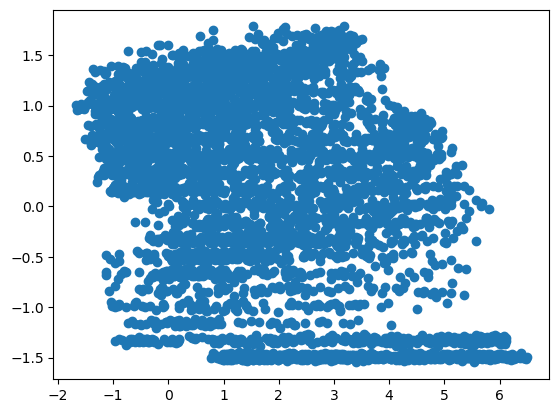

In [113]:
plt.scatter(logits,X_train_scaled['monthlycharges'])

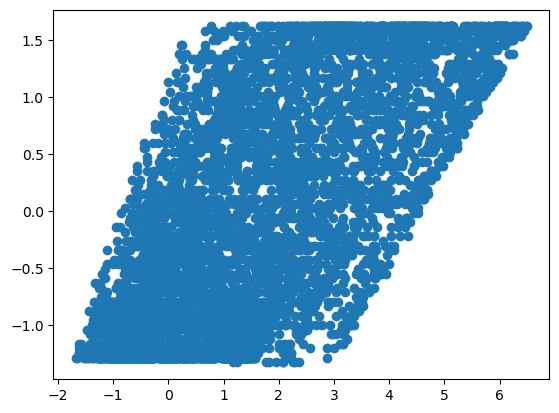

In [114]:
plt.scatter(logits,X_train_scaled['tenure'])

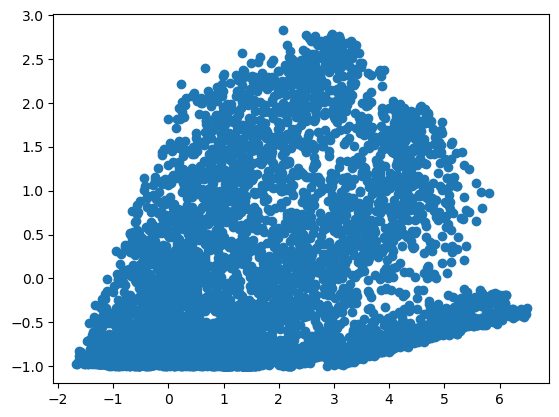

In [115]:
plt.scatter(logits,X_train_scaled['totalcharges'])

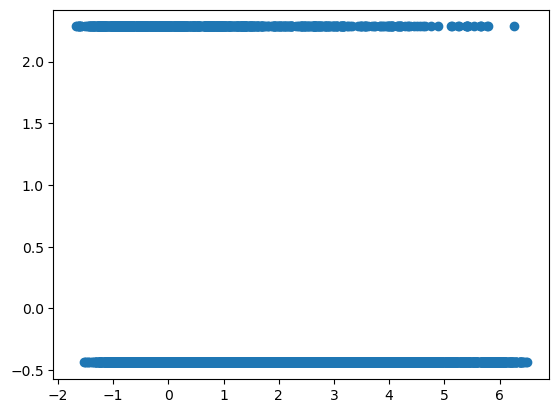

In [116]:
plt.scatter(logits,X_train_scaled['seniorcitizen'])

<AxesSubplot:>

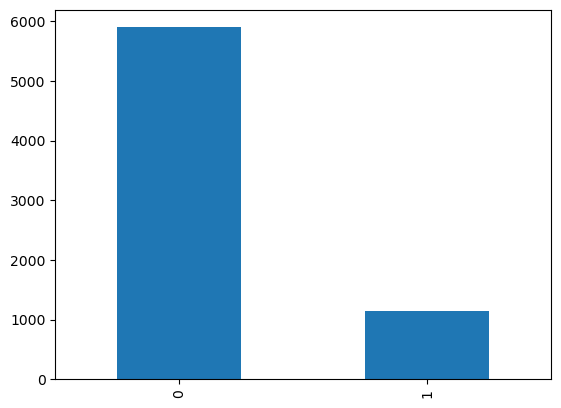

In [117]:
count_seniorcitizen = customer_chur['seniorcitizen'].value_counts()
count_seniorcitizen
count_seniorcitizen.plot(kind = 'bar')

In [118]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)
LR.score(X_test_scaled, y_test)

0.8211497515968772

In [119]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred)) #--> First the reals y_test and second de predictions pred
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.6873065015479877
recall:  0.5951742627345844
f1:  0.6379310344827587


In [120]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,pred)

array([[935, 101],
       [151, 222]], dtype=int64)

In [121]:
from sklearn.utils import resample

In [122]:
train = pd.concat([X_train_scaled, y_train],axis=1)
train.head()

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_Nophoneservice,multiplelines_Yes,...,streamingtv_Yes,streamingmovies_Nointernetservice,streamingmovies_Yes,contract_Oneyear,contract_Twoyear,paperlessbilling_Yes,paymentmethod_Creditcard(automatic),paymentmethod_Electroniccheck,paymentmethod_Mailedcheck,churn
0,-0.437749,-0.465683,-0.000474,-0.422099,-1.025166,-0.969579,1.532186,0.329573,-0.329573,-0.860523,...,-0.794748,-0.524081,1.250762,1.910109,-0.558353,-1.200007,-0.527656,-0.709650,1.84247,0
1,-0.437749,0.885537,1.074754,1.255366,-1.025166,-0.969579,-0.652662,0.329573,-0.329573,1.162083,...,1.258260,-0.524081,1.250762,-0.523530,1.790982,0.833328,-0.527656,-0.709650,-0.54275,0
2,-0.437749,-1.284605,-1.376499,-1.002985,0.975452,1.031376,-0.652662,-3.034225,3.034225,-0.860523,...,-0.794748,-0.524081,-0.799513,-0.523530,-0.558353,0.833328,-0.527656,1.409146,-0.54275,1
3,-0.437749,-1.161766,0.177346,-0.908113,0.975452,-0.969579,-0.652662,0.329573,-0.329573,-0.860523,...,-0.794748,-0.524081,-0.799513,-0.523530,-0.558353,0.833328,-0.527656,1.409146,-0.54275,1
4,-0.437749,-1.325551,-0.098524,-0.003468,0.975452,-0.969579,1.532186,0.329573,-0.329573,1.162083,...,-0.794748,-0.524081,-0.799513,-0.523530,1.790982,0.833328,-0.527656,-0.709650,-0.54275,0


In [123]:
no_churn = train[train['churn']==0]
yes_churn = train[train['churn']==1]

no_churn.head()

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_Nophoneservice,multiplelines_Yes,...,streamingtv_Yes,streamingmovies_Nointernetservice,streamingmovies_Yes,contract_Oneyear,contract_Twoyear,paperlessbilling_Yes,paymentmethod_Creditcard(automatic),paymentmethod_Electroniccheck,paymentmethod_Mailedcheck,churn
0,-0.437749,-0.465683,-0.000474,-0.422099,-1.025166,-0.969579,1.532186,0.329573,-0.329573,-0.860523,...,-0.794748,-0.524081,1.250762,1.910109,-0.558353,-1.200007,-0.527656,-0.709650,1.84247,0
1,-0.437749,0.885537,1.074754,1.255366,-1.025166,-0.969579,-0.652662,0.329573,-0.329573,1.162083,...,1.258260,-0.524081,1.250762,-0.523530,1.790982,0.833328,-0.527656,-0.709650,-0.54275,0
4,-0.437749,-1.325551,-0.098524,-0.003468,0.975452,-0.969579,1.532186,0.329573,-0.329573,1.162083,...,-0.794748,-0.524081,-0.799513,-0.523530,1.790982,0.833328,-0.527656,-0.709650,-0.54275,0
5,-0.437749,-1.038928,0.155742,-0.782767,0.975452,-0.969579,-0.652662,0.329573,-0.329573,-0.860523,...,-0.794748,-0.524081,-0.799513,-0.523530,-0.558353,0.833328,-0.527656,1.409146,-0.54275,0
6,-0.437749,-0.015277,-1.526067,-0.741811,0.975452,1.031376,1.532186,0.329573,-0.329573,-0.860523,...,-0.794748,1.908103,-0.799513,-0.523530,1.790982,-1.200007,-0.527656,-0.709650,1.84247,0


In [124]:
yes_churn.head()

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_Nophoneservice,multiplelines_Yes,...,streamingtv_Yes,streamingmovies_Nointernetservice,streamingmovies_Yes,contract_Oneyear,contract_Twoyear,paperlessbilling_Yes,paymentmethod_Creditcard(automatic),paymentmethod_Electroniccheck,paymentmethod_Mailedcheck,churn
2,-0.437749,-1.284605,-1.376499,-1.002985,0.975452,1.031376,-0.652662,-3.034225,3.034225,-0.860523,...,-0.794748,-0.524081,-0.799513,-0.52353,-0.558353,0.833328,-0.527656,1.409146,-0.54275,1
3,-0.437749,-1.161766,0.177346,-0.908113,0.975452,-0.969579,-0.652662,0.329573,-0.329573,-0.860523,...,-0.794748,-0.524081,-0.799513,-0.52353,-0.558353,0.833328,-0.527656,1.409146,-0.54275,1
8,-0.437749,-0.547575,-0.838054,-0.689001,0.975452,-0.969579,-0.652662,-3.034225,3.034225,-0.860523,...,1.258260,-0.524081,-0.799513,-0.52353,-0.558353,0.833328,-0.527656,1.409146,-0.54275,1
10,2.284413,-0.465683,0.140785,-0.361084,0.975452,1.031376,-0.652662,0.329573,-0.329573,-0.860523,...,-0.794748,-0.524081,-0.799513,-0.52353,-0.558353,0.833328,-0.527656,1.409146,-0.54275,1
26,2.284413,-0.997982,0.905243,-0.690505,-1.025166,-0.969579,-0.652662,0.329573,-0.329573,-0.860523,...,1.258260,-0.524081,1.250762,-0.52353,-0.558353,0.833328,-0.527656,1.409146,-0.54275,1


In [125]:
display(no_churn.shape)
display(yes_churn.shape)


(4138, 31)

(1496, 31)

In [126]:
yes_churn_oversampled = resample(yes_churn,
                                    replace=True,
                                    n_samples = len(no_churn),
                                    random_state=0)

In [127]:
display(no_churn.shape)
display(yes_churn_oversampled.shape)
yes_churn_oversampled.head(20)

(4138, 31)

(4138, 31)

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_Nophoneservice,multiplelines_Yes,...,streamingtv_Yes,streamingmovies_Nointernetservice,streamingmovies_Yes,contract_Oneyear,contract_Twoyear,paperlessbilling_Yes,paymentmethod_Creditcard(automatic),paymentmethod_Electroniccheck,paymentmethod_Mailedcheck,churn
2564,-0.437749,-0.301899,-0.208207,-0.348744,-1.025166,1.031376,1.532186,-3.034225,3.034225,-0.860523,...,1.258260,-0.524081,1.250762,-0.52353,-0.558353,0.833328,1.895175,-0.709650,-0.54275,1
2062,-0.437749,-1.284605,0.853726,-0.973307,0.975452,-0.969579,-0.652662,0.329573,-0.329573,-0.860523,...,1.258260,-0.524081,1.250762,-0.52353,-0.558353,0.833328,-0.527656,1.409146,-0.54275,1
4513,2.284413,-0.670414,-0.859659,-0.712664,0.975452,-0.969579,-0.652662,-3.034225,3.034225,-0.860523,...,1.258260,-0.524081,-0.799513,-0.52353,-0.558353,0.833328,-0.527656,-0.709650,1.84247,1
3045,2.284413,0.189454,1.204379,0.642613,0.975452,-0.969579,-0.652662,0.329573,-0.329573,1.162083,...,1.258260,-0.524081,1.250762,-0.52353,-0.558353,0.833328,-0.527656,1.409146,-0.54275,1
2815,-0.437749,-0.957036,-0.316228,-0.814435,0.975452,-0.969579,1.532186,0.329573,-0.329573,-0.860523,...,1.258260,-0.524081,-0.799513,-0.52353,-0.558353,-1.200007,-0.527656,1.409146,-0.54275,1
5137,-0.437749,-1.284605,-0.640292,-0.993188,0.975452,-0.969579,-0.652662,0.329573,-0.329573,-0.860523,...,-0.794748,-0.524081,-0.799513,-0.52353,-0.558353,0.833328,-0.527656,1.409146,-0.54275,1
3816,2.284413,0.312292,1.229307,0.793988,0.975452,1.031376,-0.652662,0.329573,-0.329573,1.162083,...,1.258260,-0.524081,1.250762,-0.52353,-0.558353,-1.200007,-0.527656,1.409146,-0.54275,1
1007,-0.437749,-1.243659,0.095915,-0.961763,0.975452,-0.969579,-0.652662,0.329573,-0.329573,-0.860523,...,-0.794748,-0.524081,-0.799513,-0.52353,-0.558353,0.833328,-0.527656,1.409146,-0.54275,1
2224,-0.437749,-0.056223,0.873668,0.311512,-1.025166,1.031376,1.532186,0.329573,-0.329573,1.162083,...,-0.794748,-0.524081,1.250762,-0.52353,-0.558353,0.833328,-0.527656,1.409146,-0.54275,1
4046,2.284413,-0.957036,1.149538,-0.606712,0.975452,-0.969579,-0.652662,0.329573,-0.329573,1.162083,...,1.258260,-0.524081,1.250762,-0.52353,-0.558353,0.833328,1.895175,-0.709650,-0.54275,1


In [128]:
train_oversampled = pd.concat([no_churn,yes_churn_oversampled],axis=0)
train_oversampled.head()

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_Nophoneservice,multiplelines_Yes,...,streamingtv_Yes,streamingmovies_Nointernetservice,streamingmovies_Yes,contract_Oneyear,contract_Twoyear,paperlessbilling_Yes,paymentmethod_Creditcard(automatic),paymentmethod_Electroniccheck,paymentmethod_Mailedcheck,churn
0,-0.437749,-0.465683,-0.000474,-0.422099,-1.025166,-0.969579,1.532186,0.329573,-0.329573,-0.860523,...,-0.794748,-0.524081,1.250762,1.910109,-0.558353,-1.200007,-0.527656,-0.709650,1.84247,0
1,-0.437749,0.885537,1.074754,1.255366,-1.025166,-0.969579,-0.652662,0.329573,-0.329573,1.162083,...,1.258260,-0.524081,1.250762,-0.523530,1.790982,0.833328,-0.527656,-0.709650,-0.54275,0
4,-0.437749,-1.325551,-0.098524,-0.003468,0.975452,-0.969579,1.532186,0.329573,-0.329573,1.162083,...,-0.794748,-0.524081,-0.799513,-0.523530,1.790982,0.833328,-0.527656,-0.709650,-0.54275,0
5,-0.437749,-1.038928,0.155742,-0.782767,0.975452,-0.969579,-0.652662,0.329573,-0.329573,-0.860523,...,-0.794748,-0.524081,-0.799513,-0.523530,-0.558353,0.833328,-0.527656,1.409146,-0.54275,0
6,-0.437749,-0.015277,-1.526067,-0.741811,0.975452,1.031376,1.532186,0.329573,-0.329573,-0.860523,...,-0.794748,1.908103,-0.799513,-0.523530,1.790982,-1.200007,-0.527656,-0.709650,1.84247,0


In [129]:
y_train_over = train_oversampled['churn'].copy()
X_train_over = train_oversampled.drop('churn',axis = 1).copy()

In [130]:
LR_over = LogisticRegression(random_state=0, solver='lbfgs')
LR_over.fit(X_train_over, y_train_over)
pred = LR_over.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.5191986644407346
recall:  0.8337801608579088
f1:  0.6399176954732511


In [131]:
confusion_matrix(y_test,pred)

array([[748, 288],
       [ 62, 311]], dtype=int64)

In [132]:
no_churn_undersampled = resample(no_churn, 
                                    replace=False,
                                    n_samples = len(yes_churn),
                                    random_state=0)

In [133]:
display(yes_churn.shape)
display(no_churn_undersampled.shape)

(1496, 31)

(1496, 31)

In [134]:
train_undersampled = pd.concat([yes_churn,no_churn_undersampled], axis=0)
train_undersampled.head()

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_Nophoneservice,multiplelines_Yes,...,streamingtv_Yes,streamingmovies_Nointernetservice,streamingmovies_Yes,contract_Oneyear,contract_Twoyear,paperlessbilling_Yes,paymentmethod_Creditcard(automatic),paymentmethod_Electroniccheck,paymentmethod_Mailedcheck,churn
2,-0.437749,-1.284605,-1.376499,-1.002985,0.975452,1.031376,-0.652662,-3.034225,3.034225,-0.860523,...,-0.794748,-0.524081,-0.799513,-0.52353,-0.558353,0.833328,-0.527656,1.409146,-0.54275,1
3,-0.437749,-1.161766,0.177346,-0.908113,0.975452,-0.969579,-0.652662,0.329573,-0.329573,-0.860523,...,-0.794748,-0.524081,-0.799513,-0.52353,-0.558353,0.833328,-0.527656,1.409146,-0.54275,1
8,-0.437749,-0.547575,-0.838054,-0.689001,0.975452,-0.969579,-0.652662,-3.034225,3.034225,-0.860523,...,1.258260,-0.524081,-0.799513,-0.52353,-0.558353,0.833328,-0.527656,1.409146,-0.54275,1
10,2.284413,-0.465683,0.140785,-0.361084,0.975452,1.031376,-0.652662,0.329573,-0.329573,-0.860523,...,-0.794748,-0.524081,-0.799513,-0.52353,-0.558353,0.833328,-0.527656,1.409146,-0.54275,1
26,2.284413,-0.997982,0.905243,-0.690505,-1.025166,-0.969579,-0.652662,0.329573,-0.329573,-0.860523,...,1.258260,-0.524081,1.250762,-0.52353,-0.558353,0.833328,-0.527656,1.409146,-0.54275,1


In [136]:
y_train_under = train_undersampled['churn'].copy()
X_train_under = train_undersampled.drop('churn',axis = 1).copy()

In [137]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_under, y_train_under)
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.5223880597014925
recall:  0.8445040214477212
f1:  0.6454918032786885


In [138]:
confusion_matrix(y_test,pred)

array([[748, 288],
       [ 58, 315]], dtype=int64)

In [139]:
!pip install imblearn
from imblearn.over_sampling import SMOTE

In [140]:
sm = SMOTE(random_state=100, k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [141]:
X_train_SMOTE.shape

(8276, 30)

In [142]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.5268630849220104
recall:  0.8150134048257373
f1:  0.6399999999999999


In [143]:
confusion_matrix(y_test,pred)

array([[763, 273],
       [ 69, 304]], dtype=int64)